## Pretrained Autoencoder

In [1]:
import numpy as np

### Load and normalize mnist data

In [2]:
from tensorflow.keras.datasets import mnist


# load MNIST data
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(test_images.shape)

# Flatten the images for a autoencoder input (28x28 is 784 -- therfore, input is 784 neurons)
train_images = np.reshape(train_images, (-1, 784))
test_images = np.reshape(test_images, (-1, 784))
print(train_images.shape)
print(test_images.shape)

# Normalize data - since it's grayscale, we can divide by 255 to get each pixel between 0 and 1
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

(60000, 28, 28)
(10000, 28, 28)
(60000, 784)
(10000, 784)


In [3]:
type(test_images)

numpy.ndarray

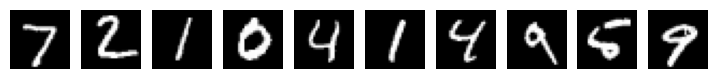

In [4]:
from matplotlib import pyplot as plt

n = 10
plt.figure(figsize=(9, 2))
for i in range(n):
  ax = plt.subplot(1, n, i+1)
  plt.imshow(test_images[i].reshape(28, 28), cmap="gray")
  ax.axis('off')

plt.show()

## Load trained 

In [5]:
from tensorflow import keras

pretrained_model = keras.models.load_model('initially_trained_autoencoder.h5')

313/313 [==============================] - 1s 3ms/step


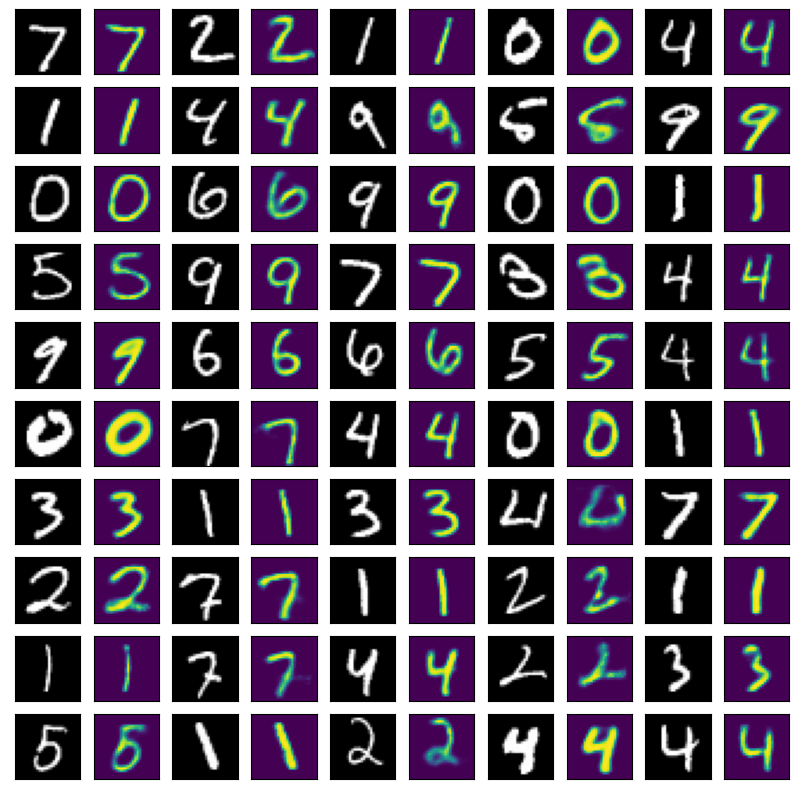

In [6]:
reconstructed_images = pretrained_model.predict(test_images)

images = []
for i in range(100):
    images.append(test_images[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()

## Load our data

I have selected the letter m for training in different angles so that to test the auto encoder

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image

m1 = tf.keras.utils.load_img('./data/m1.png', target_size=(28, 28), color_mode = "grayscale")
m2 = tf.keras.utils.load_img('./data/m2.png', target_size=(28, 28), color_mode = "grayscale")
m3 = tf.keras.utils.load_img('./data/m3.png', target_size=(28, 28), color_mode = "grayscale")
m4 = tf.keras.utils.load_img('./data/m4.png', target_size=(28, 28), color_mode = "grayscale")
m5 = tf.keras.utils.load_img('./data/m5.png', target_size=(28, 28), color_mode = "grayscale")

In [8]:
new_images = np.vstack([m1,m2,m3,m4,m5,])
test_m = new_images.reshape(-1, 784)
train_m = new_images.reshape(-1, 784)
train_m = train_m.astype('float32') / 255
test_m = test_m.astype('float32') / 255

In [9]:
test_m.shape

(5, 784)

## Oversampling

In [10]:
train_m = np.repeat(train_m[:],50,axis=0)

In [11]:
train_m.shape

(250, 784)

<function matplotlib.pyplot.show(close=None, block=None)>

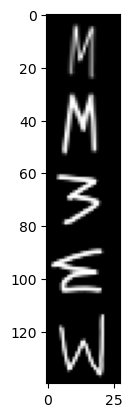

In [12]:
plt.imshow(new_images,cmap="gray")
ax.axis('off')
plt.show

### Create an autoencoder model.

In [13]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

input_dim = 28*28
latent_vec_len = 784 # this is the 'bottleneck' of the autoencoder

# Define the autoencoder architecture
# build the encoder
autoencoder = Sequential()
autoencoder.add(Input(shape=(input_dim,)))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(100, activation='relu'))

# the bottleneck layer
autoencoder.add(Dense(latent_vec_len, activation='relu'))

# the decoder layer
autoencoder.add(Dense(100, activation='relu'))
autoencoder.add(Dense(300, activation='relu'))
autoencoder.add(Dense(500, activation='relu'))
autoencoder.add(Dense(input_dim, activation='sigmoid'))

# Compile the autoencoder model
autoencoder.compile(loss='binary_crossentropy', optimizer='adam')

# Get summary
autoencoder.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 500)               392500    
                                                                 
 dense_1 (Dense)             (None, 300)               150300    
                                                                 
 dense_2 (Dense)             (None, 100)               30100     
                                                                 
 dense_3 (Dense)             (None, 784)               79184     
                                                                 
 dense_4 (Dense)             (None, 100)               78500     
                                                                 
 dense_5 (Dense)             (None, 300)               30300     
                                                                 
 dense_6 (Dense)             (None, 500)               1

In [14]:
from tensorflow.keras.callbacks import EarlyStopping # EarlyStopping during model training

## Random sampling

In [15]:
new_image_set = train_images[:20000]
for i in range(len(train_m)):
    input_arr = train_m[i]
    input_arr = input_arr.reshape(784)
    np.random.shuffle(train_m)

    bad_images = np.repeat(input_arr.reshape(-1, 1, 28, 28), 135, axis=1).reshape(-1, 784)
    new_image_set = np.concatenate((new_image_set, bad_images))

    np.random.shuffle(new_image_set)

new_images_train = new_image_set[int(len(new_image_set)*.8):]
new_images_test = new_image_set[int(len(new_image_set)*.2):]

## Training

In [16]:
early_stop = EarlyStopping(monitor='loss', patience=3, verbose=1)
history = autoencoder.fit(
x=new_images_train, # For autoencoders, both the input and the target are the same
y=new_images_train, 
epochs=15, 
batch_size=128,
shuffle=True, 
validation_data=(new_images_test, new_images_test),
callbacks=[early_stop]
)
print('m-',i+1)


Epoch 1/15
84/84 [==============================] - 4s 31ms/step - loss: 0.2421 - val_loss: 0.1462
Epoch 2/15
84/84 [==============================] - 3s 30ms/step - loss: 0.1376 - val_loss: 0.1304
Epoch 3/15
84/84 [==============================] - 3s 30ms/step - loss: 0.1233 - val_loss: 0.1181
Epoch 4/15
84/84 [==============================] - 2s 30ms/step - loss: 0.1139 - val_loss: 0.1109
Epoch 5/15
84/84 [==============================] - 2s 30ms/step - loss: 0.1084 - val_loss: 0.1078
Epoch 6/15
84/84 [==============================] - 2s 30ms/step - loss: 0.1051 - val_loss: 0.1047
Epoch 7/15
84/84 [==============================] - 3s 30ms/step - loss: 0.1024 - val_loss: 0.1019
Epoch 8/15
84/84 [==============================] - 3s 30ms/step - loss: 0.1001 - val_loss: 0.1009
Epoch 9/15
84/84 [==============================] - 3s 31ms/step - loss: 0.0985 - val_loss: 0.0990
Epoch 10/15
84/84 [==============================] - 3s 31ms/step - loss: 0.0973 - val_loss: 0.0978
Epoch 11/

## Test

1344/1344 [==============================] - 4s 3ms/step


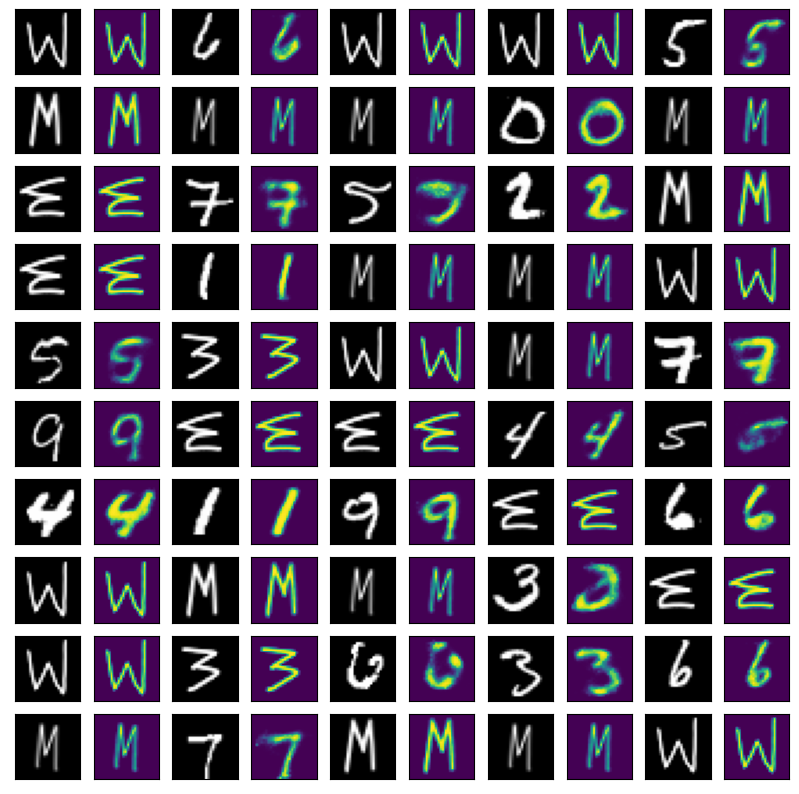

In [17]:
reconstructed_images = autoencoder.predict(new_images_test)
images = []
for i in range(200):
    images.append(new_images_test[i].reshape(28,28))
    images.append(reconstructed_images[i].reshape(28,28))
rows = 10
cols = 10
plt.figure(figsize=(10,10))
for i in range(rows*cols):
    plt.subplot(rows,cols,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if (i%2 == 0):
        plt.imshow(images[i],cmap='gray')
    else:
        plt.imshow(images[i])
plt.show()
    

In [18]:
autoencoder.save('WE11_autoencoder.h5')

As the model is trained with both the datasets we can see that model is able to predict both the mnist and our dataset almost correctly but few images like 5 missed sharp curves ,9 is small, number 3 is not fully predicted. So continued training might result in good results.